In [13]:
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from keras import models, layers
import keras, os
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16, VGG19, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image
from io import BytesIO
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/Users/adrianabrazon/Documents/IronHack/final_project/dog_files/pets_for_adoption.csv')

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Folder paths
folder_path = '/Users/adrianabrazon/Documents/IronHack/final_project/images'
train_folder_path = '/Users/adrianabrazon/Documents/IronHack/final_project/train_images'
test_folder_path = '/Users/adrianabrazon/Documents/IronHack/final_project/test_images'
val_folder_path = '/Users/adrianabrazon/Documents/IronHack/final_project/val_images'

# Get list of all filenames from the folder path
filenames = os.listdir(folder_path)

# Specify the proportions for training, testing, and validation
train_size = 0.6  # 60% for training
test_size = 0.2   # 20% for testing
val_size = 1 - train_size - test_size  # Remaining for validation

# Split the data into train and temp sets
train_filenames, temp_filenames = train_test_split(filenames, test_size=(1 - train_size))

# Split the temp set into test and validation sets
test_filenames, val_filenames = train_test_split(temp_filenames, test_size=(test_size / (test_size + val_size)))

# Create train, test, and validation folders if they don't exist
os.makedirs(train_folder_path, exist_ok=True)
os.makedirs(test_folder_path, exist_ok=True)
os.makedirs(val_folder_path, exist_ok=True)

# Move or copy images to train, test, and validation folders
def copy_files(src_folder, dst_folder, filenames):
    for filename in filenames:
        src_path = os.path.join(src_folder, filename)
        dst_path = os.path.join(dst_folder, filename)
        shutil.copyfile(src_path, dst_path)

copy_files(folder_path, train_folder_path, train_filenames)
copy_files(folder_path, test_folder_path, test_filenames)
copy_files(folder_path, val_folder_path, val_filenames)

In [15]:
df=dog_df

In [17]:
# Load DataFrame containing dog information with image URLs

# Load pretrained models
# Load pretrained models
vgg16_model = VGG16(weights='imagenet', include_top=False)
vgg19_model = VGG19(weights='imagenet', include_top=False)
resnet50_model = ResNet50(weights='imagenet', include_top=False)

# Function to preprocess image for each model
def preprocess_image(img_path, model_name):
    img = image.load_img(img_path, target_size=(224, 224))
    if model_name == 'vgg16':
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = vgg16_preprocess_input(img_array)
    elif model_name == 'vgg19':
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = vgg19_preprocess_input(img_array)
    elif model_name == 'resnet50':
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = resnet50_preprocess_input(img_array)
    return img_array

# Function to extract features for each model
def extract_features(img_path, model):
    img = preprocess_image(img_path, model_name)
    features = model.predict(img)
    return features.flatten()  # Flatten the features to store in DataFrame

# Define the directory containing the input image
input_image_path = '/Users/adrianabrazon/Documents/IronHack/final_project/given_images/img_1066_720.jpeg'

# Define the directory containing all the images
images_directory = '/Users/adrianabrazon/Documents/IronHack/final_project/images'

# Get a list of all image file names in the directory
image_files = os.listdir(images_directory)

# Evaluate models
vgg16_accuracy = vgg16_model.evaluate(X_test_vgg16, y_test)
vgg19_accuracy = vgg19_model.evaluate(X_test_vgg19, y_test)
resnet50_accuracy = resnet50_model.evaluate(X_test_resnet50, y_test)

# Compare accuracy
model_accuracies = {'VGG16': vgg16_accuracy, 'VGG19': vgg19_accuracy, 'ResNet50': resnet50_accuracy}
best_model = max(model_accuracies, key=model_accuracies.get)
print("Model Accuracies:", model_accuracies)
print("Best Model:", best_model)

# Preprocess the input image for the best model
input_image_features = extract_features(input_image_path, best_model)

# Calculate similarities between input image and all images in the directory
similarities = []
for image_file in image_files:
    image_path = os.path.join(images_directory, image_file)
    image_features = extract_features(image_path, best_model)
    similarity = np.dot(input_image_features, image_features)
    similarities.append(similarity)

# Find indices of top 5 similar images
matched_indices = np.argsort(similarities)[::-1][:5]

# Visualize top 5 similar images
for i, index in enumerate(matched_indices):
    image_path = os.path.join(images_directory, image_files[index])
    img = image.load_img(image_path)
    plt.imshow(img)
    plt.title(f"Similar Image {i+1}: {image_files[index]}")
    plt.axis('off')
    plt.show()
    print("Image Path:", image_path)

NameError: name 'X_test_vgg16' is not defined

In [ ]:
# Split dataset into training and testing sets
X_train_vgg16, X_test_vgg16, y_train, y_test = train_test_split(np.array(dog_df['features_vgg16'].tolist()), dog_df['label'], test_size=0.2, random_state=42)
X_train_vgg19, X_test_vgg19 = train_test_split(np.array(dog_df['features_vgg19'].tolist()), test_size=0.2, random_state=42)
X_train_resnet50, X_test_resnet50 = train_test_split(np.array(dog_df['features_resnet50'].tolist()), test_size=0.2, random_state=42)

# Train models
# Assuming you have defined and trained your models elsewhere

# Evaluate models
vgg16_accuracy = vgg16_model.evaluate(X_test_vgg16, y_test)
vgg19_accuracy = vgg19_model.evaluate(X_test_vgg19, y_test)
resnet50_accuracy = resnet50_model.evaluate(X_test_resnet50, y_test)

# Compare accuracy
model_accuracies = {'VGG16': vgg16_accuracy, 'VGG19': vgg19_accuracy, 'ResNet50': resnet50_accuracy}
best_model = max(model_accuracies, key=model_accuracies.get)

# Extract features for the best model
if best_model == 'VGG16':
    X_test_best_model = X_test_vgg16
elif best_model == 'VGG19':
    X_test_best_model = X_test_vgg19
elif best_model == 'ResNet50':
    X_test_best_model = X_test_resnet50

# Find the top 5 predictions for the best model
top_5_indices = np.argsort(X_test_best_model)[::-1][:5]
top_5_dogs = dog_df.iloc[top_5_indices]

# Visualize top 5 results
for i, row in top_5_dogs.iterrows():
    img_path = row['local_image_path']
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"Top {i+1}: {row['dog_name']}")
    plt.axis('off')
    plt.show()
    print("Dog Name:", row['dog_name'])
    print("Image Path:", row['local_image_path'])
    print("URL:", row['doggo_pic_url'])
    print("\n")

In [ ]:
dataset = pd.read_csv('/Users/adrianabrazon/Documents/IronHack/final_project/dog_files/pets_for_adoption.csv')
dataset.head()

,doggo_name,doggo_pic_url,doggo_url,animal_id
0,Keisha,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19921455
1,Mayflower,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20026683
2,George,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19628021
3,Billie,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20109890
4,Henry,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20109891


In [4]:
# model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = VGG19(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

80134624/80134624 [==============================] - 4s 0us/step


In [5]:
def extract_feature_vector(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    image = np.expand_dims(image, axis=0)
    feature_vector = model.predict(image)
    return feature_vector.flatten()

In [6]:
folder_path = '/Users/adrianabrazon/Documents/IronHack/final_project/images'
given_image_path = '/Users/adrianabrazon/Documents/IronHack/final_project/given_images/img_1066_720.jpeg'
given_feature_vector = extract_feature_vector(given_image_path)
image_similarity_scores = {}
for filename in os.listdir(folder_path)[:10]:
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(folder_path, filename)
        feature_vector = extract_feature_vector(image_path)
        similarity_score = cosine_similarity([given_feature_vector], [feature_vector])[0][0]
        image_similarity_scores[filename] = similarity_score
top_5_similar_images = sorted(image_similarity_scores.items(), key=lambda x: x[1], reverse=True)[:5]

1/1 [==============================] - 1s 522ms/step


In [7]:
print(top_5_similar_images)

[('19892327.jpg', 0.5425302), ('20236587.jpg', 0.5311231), ('20204521.jpg', 0.528746), ('20389349.jpg', 0.44544083), ('20376362.jpg', 0.42469114)]


In [80]:
test = int(top_5_similar_images[0][0].replace('.jpg',''))
type(test)

int

In [8]:
recommended_id1=[]

for i in range(len(top_5_similar_images)):
    id_=int(top_5_similar_images[i][0].replace('.jpg',''))
    # print(id_)
    recommended_id1.append(id_)
print(recommended_id1)

[19892327, 20236587, 20204521, 20389349, 20376362]


In [102]:
# Adding a single element to the end of the list
my_list = []
my_list.append(id_)

# Adding multiple elements from another iterable
additional_elements = [5, 6, 7]
my_list.extend(additional_elements)

print(my_list)  # Output: [1, 2, 3, 4, 5, 6, 7]

['20376362', 5, 6, 7]


In [52]:
type(recommended_id1)

list

In [90]:
print(recommended_id1)

[20376362]


In [9]:
# we load the DataFrame from which we will recommend dogs in adoption from: 

df = pd.read_csv('/Users/adrianabrazon/Documents/IronHack/final_project/dog_files/pets_for_adoption.csv')

In [10]:
df

,doggo_name,doggo_pic_url,doggo_url,animal_id
0,Keisha,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19921455
1,Mayflower,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20026683
2,George,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19628021
3,Billie,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20109890
4,Henry,https://cdn.rescuegroups.org/4319/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20109891
...,...,...,...,...
19986,JC Penny,https://cdn.rescuegroups.org/4598/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19613415
19987,Nate,no photo,https://www.aspca.org/adopt-pet/adoptable-dogs...,19627552
19988,Rocket,https://cdn.rescuegroups.org/4598/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19628000
19989,Hunter,https://cdn.rescuegroups.org/4598/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19642640


In [43]:
# recommended_images = {}
# recommended_images['123.jpg'] = 0.3456
# recommended_images['124.jpg'] = 0.3342
# recommended_images['125.jpg'] = 0.3156
# # recommended_images['126.jpg'] = 0.3023

# for i in range(len(image_similarity_scores)):
#     recommended_id1 = list(list(image_similarity_scores.keys())[i].split(".")[0])

In [86]:
print(recommended_id1)

[20376362]


In [11]:
for i in range(0,5):
    filtered_df = df[df['animal_id']==recommended_id1[i]]
    filtered_df
    display(filtered_df)

,doggo_name,doggo_pic_url,doggo_url,animal_id
396,Caillou,https://cdn.rescuegroups.org/9427/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,19892327


,doggo_name,doggo_pic_url,doggo_url,animal_id
906,Oreo GCH,https://cdn.rescuegroups.org/956/pictures/anim...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20236587


,doggo_name,doggo_pic_url,doggo_url,animal_id
867,Dottie Dixon,https://cdn.rescuegroups.org/956/pictures/anim...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20204521


,doggo_name,doggo_pic_url,doggo_url,animal_id
999,Sophie Pocket Girl with That FACE!,https://cdn.rescuegroups.org/8130/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20389349


,doggo_name,doggo_pic_url,doggo_url,animal_id
431,Mike,https://cdn.rescuegroups.org/5948/pictures/ani...,https://www.aspca.org/adopt-pet/adoptable-dogs...,20376362


In [15]:
model.trainable = False

flat1 = model.layers[-1].output

class1 = layers.Dense(64, activation='relu')(flat1)

outputs = tf.keras.layers.Dense(36, activation='softmax')(class1)

inputs = model.input

model_vgg19 = tf.keras.Model(inputs=inputs, outputs=outputs)

model_vgg19.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_vgg19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

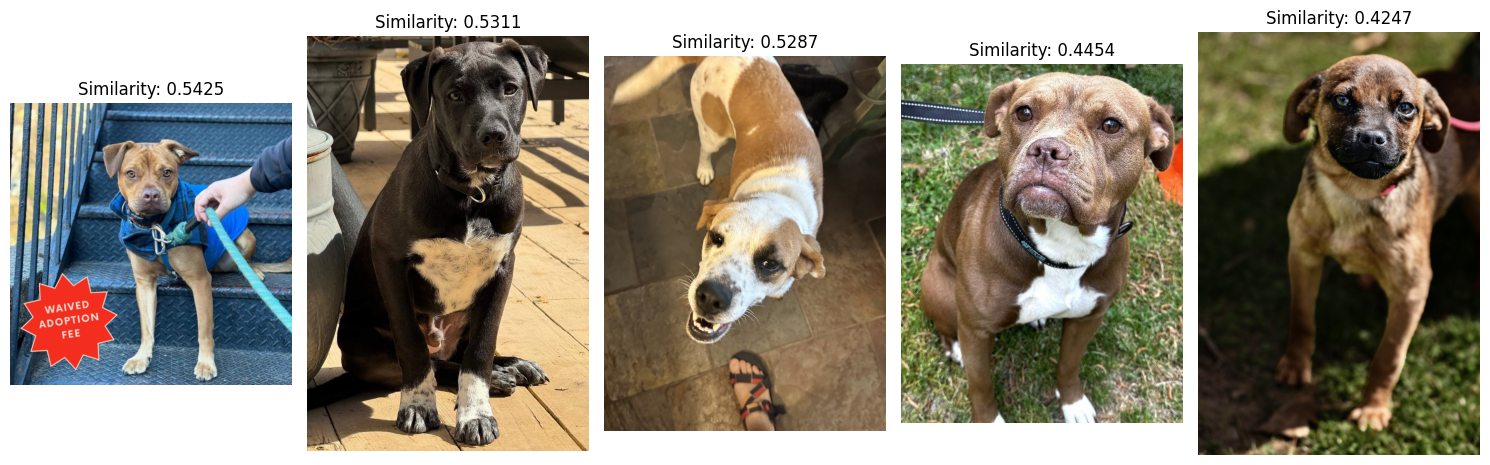

In [13]:
plt.figure(figsize=(15, 10))
for i, (filename, similarity_score) in enumerate(top_5_similar_images):
    image_path = os.path.join(folder_path, filename)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(f"Similarity: {similarity_score:.4f}")
    plt.axis('off')
plt.tight_layout()
plt.show()